In [4]:
import configparser
from pathlib import Path
import pandas as pd
import pandas.io.sql as pandasql
from psycopg2 import connect
import numpy
from psycopg2.extras import execute_values
from datetime import datetime
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import copy
import rick
import matplotlib.ticker as ticker
from setuptools import setup, find_packages
from math import factorial
from simanneal import Annealer
from itertools import islice 
import matplotlib.patches as patches
CONFIG = configparser.ConfigParser()
CONFIG.read(str(Path.home().joinpath('db.cfg')))
from itertools import combinations, chain
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

## Baseline speed pct 25th distribution 

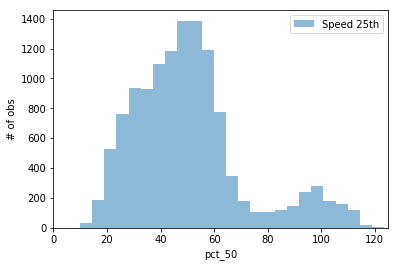

In [114]:
speed_dis1 = pd.read_sql('''select spd_baseline_25pct from congestion.tt_segments_baseline_v4_2019''',con)
plt.hist(speed_dis1.spd_baseline_25pct, 25, alpha=0.5, label='Speed 25th')
plt.xlabel('pct_50')
plt.ylabel('# of obs')
plt.xlim(0, 125)
plt.legend(loc='upper right')
plt.show()

## Investigate segments with tti > 4 

In [233]:
am_segments = pd.read_sql('''with temp as (
select segment_id, avg(tti) as avg_tti, avg(bi) as avg_bi, geom
from congestion.metrics_v4_2019 inner join congestion.segments_v4 using (segment_id)
where time_bin <@ '[07:00:00, 10:00:00]'::timerange
group by segment_id, geom)
select segment_id, avg_tti, geom from temp where avg_tti > 4''', con)
pm_segments = pd.read_sql('''with temp as (
select segment_id, avg(tti) as avg_tti, avg(bi) as avg_bi, geom
from congestion.metrics_v4_2019 inner join congestion.segments_v4 using (segment_id)
where time_bin <@ '[16:00:00, 19:00:00]'::timerange
group by segment_id, geom)
select segment_id, avg_tti, geom from temp where avg_tti > 4''', con)
baseline = pd.read_sql('''select * from congestion.tt_segments_baseline_v4_2019''',con)
data = pd.read_sql('''select * from congestion.metrics_v4_2019''', con)

## AM Peak 

Segment_id:3625
Baseline speed: 112.20118923967


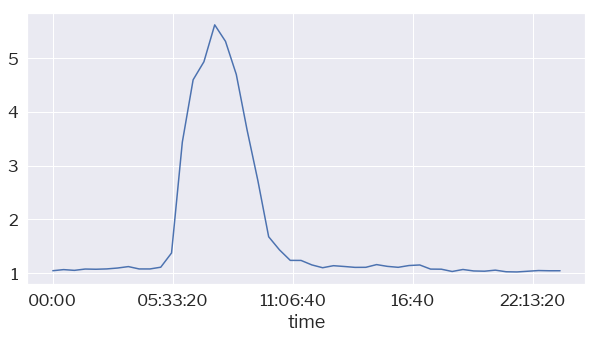

Segment_id:3627
Baseline speed: 113.127090069558


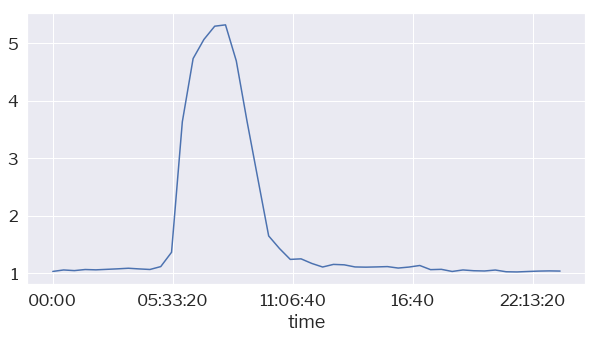

Segment_id:3822
Baseline speed: 81.9557903343901


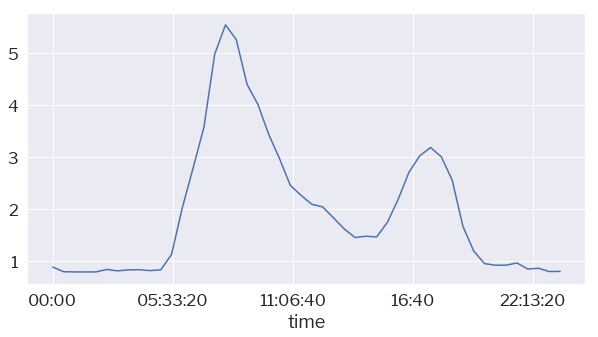

Segment_id:3823
Baseline speed: 83.8585907464677


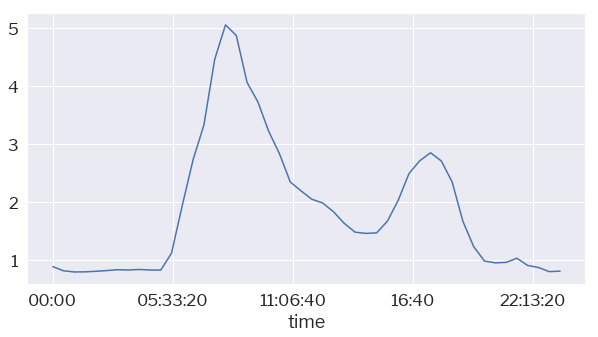

Segment_id:4533
Baseline speed: 81.6241450340489


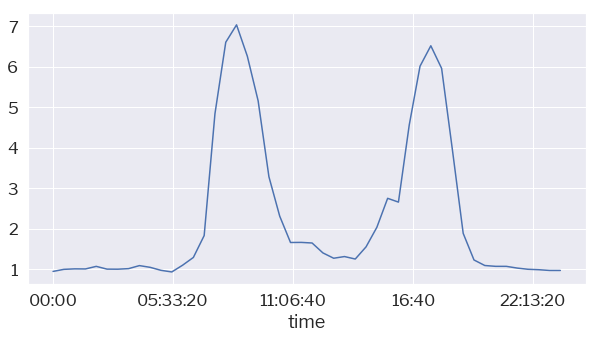

Segment_id:4540
Baseline speed: 68.0585755555009


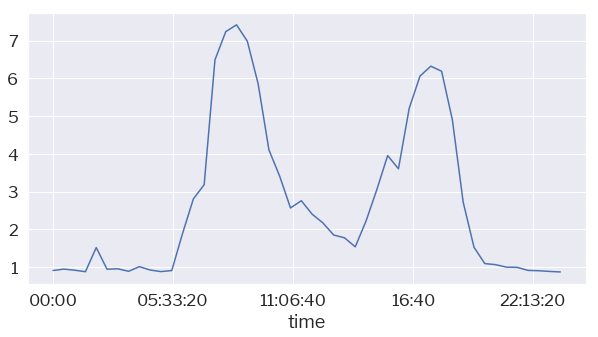

Segment_id:5877
Baseline speed: 85.7726926660992


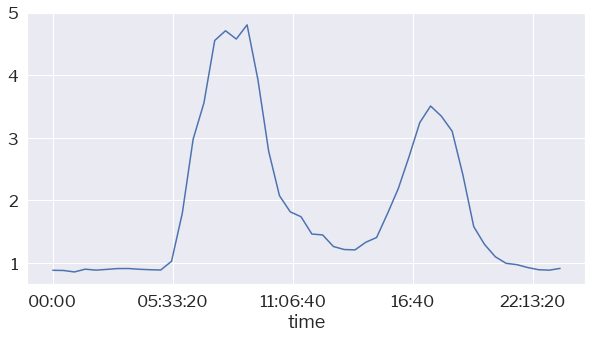

Segment_id:6371
Baseline speed: 95.1214472193709


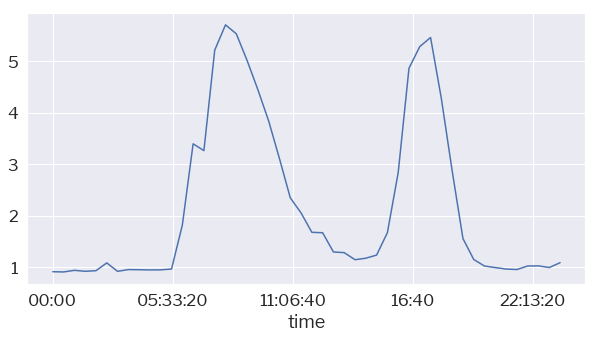

Segment_id:7213
Baseline speed: 100.765478096269


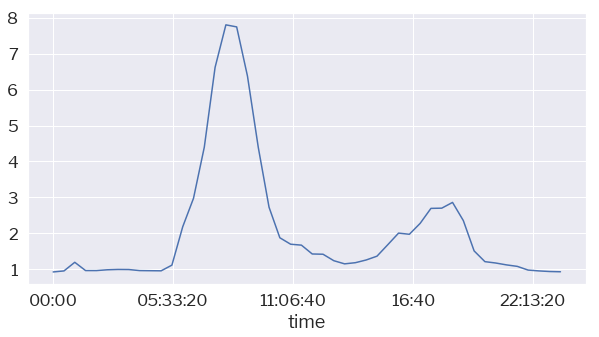

Segment_id:7214
Baseline speed: 88.6793178081648


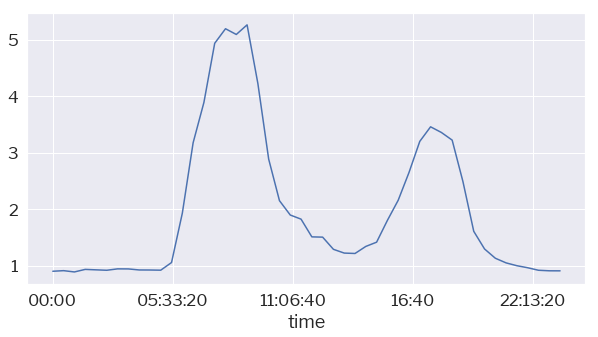

Segment_id:7215
Baseline speed: 98.3325825698771


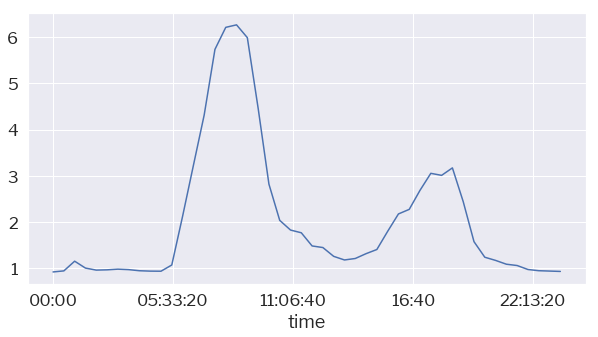

Segment_id:7216
Baseline speed: 94.6326438277904


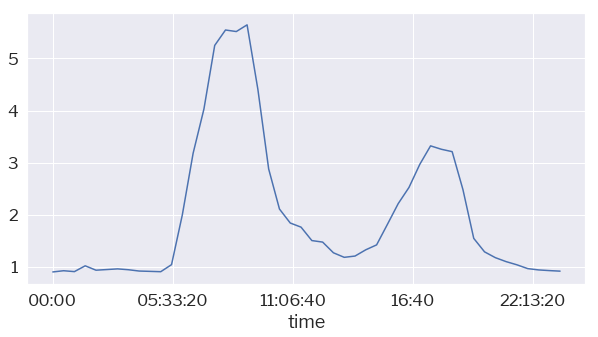

Segment_id:7405
Baseline speed: 78.7966956647067


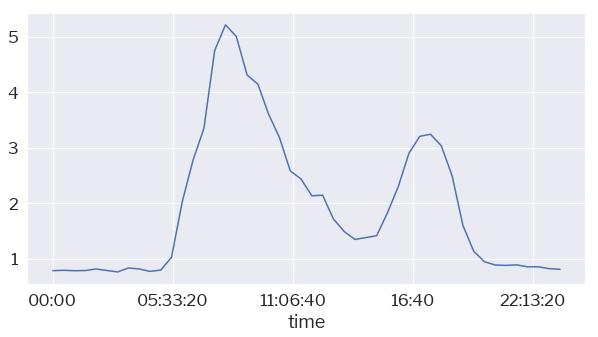

Segment_id:8236
Baseline speed: 99.2249367070003


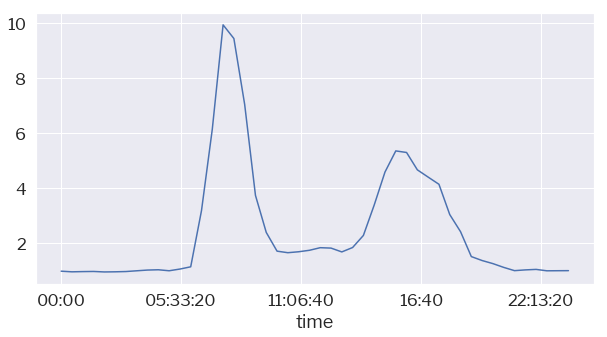

Segment_id:8237
Baseline speed: 92.0


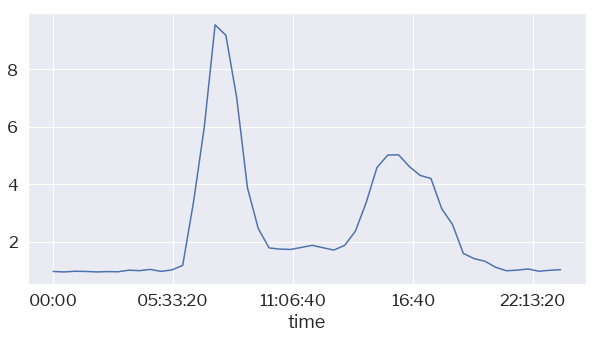

Segment_id:8238
Baseline speed: 100.701028706247


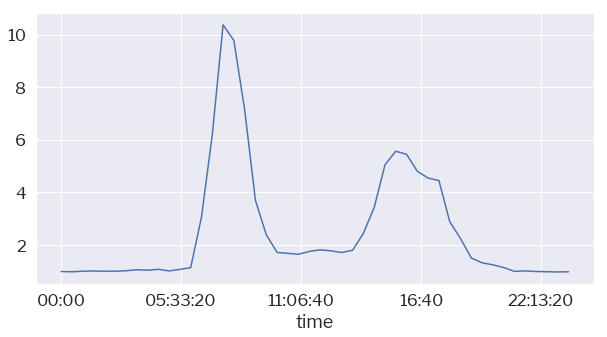

Segment_id:8925
Baseline speed: 95.3894795641197


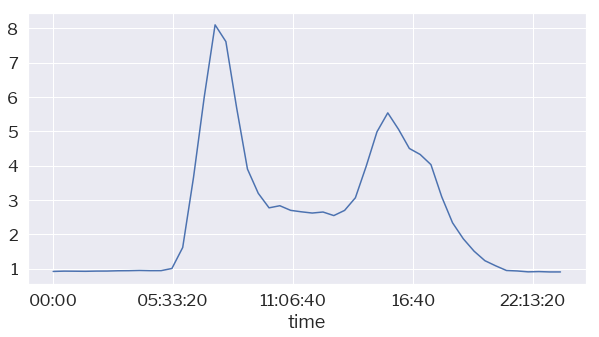

Segment_id:8926
Baseline speed: 91.335730660836


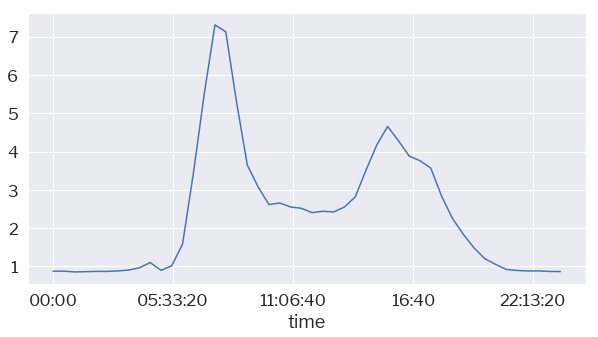

Segment_id:9575
Baseline speed: 80.7750270324173


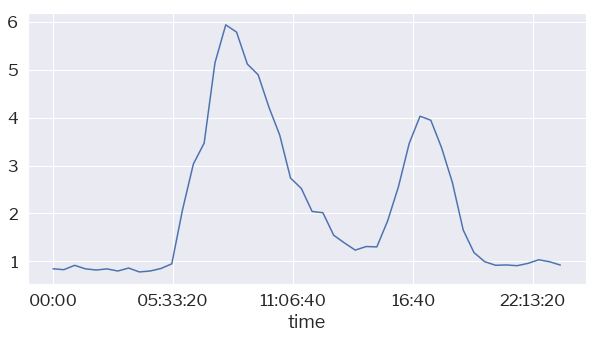

Segment_id:9628
Baseline speed: 74.9950623108392


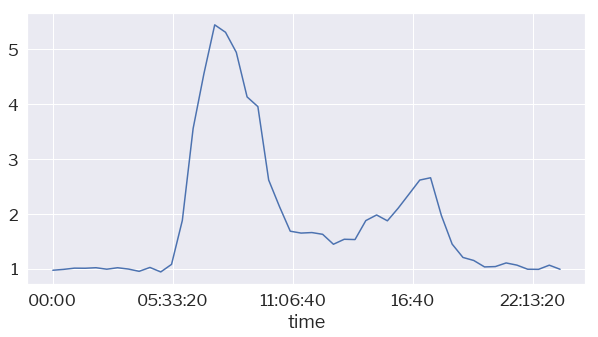

Segment_id:9629
Baseline speed: 78.8216373031889


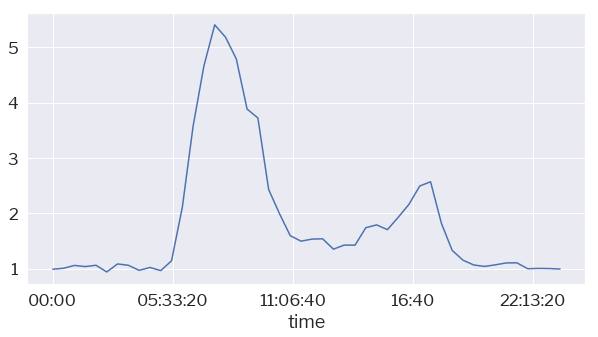

Segment_id:9630
Baseline speed: 85.7979158348275


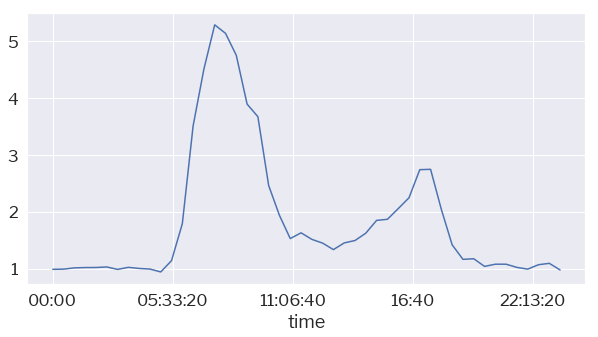

Segment_id:10392
Baseline speed: 85.9702512820073


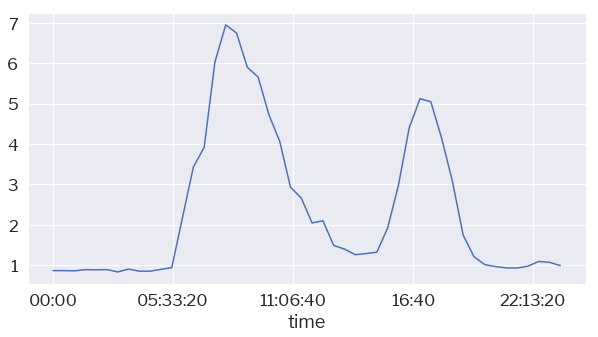

Segment_id:10393
Baseline speed: 92.3255708506895


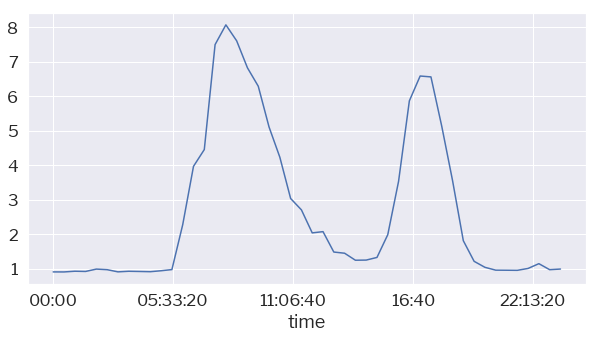

Segment_id:10662
Baseline speed: 66.0648078372268


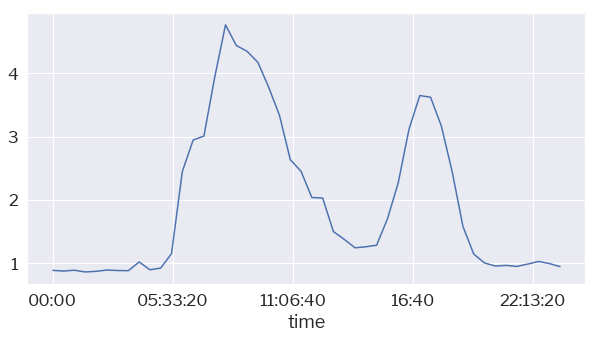

Segment_id:10663
Baseline speed: 62.7921579217998


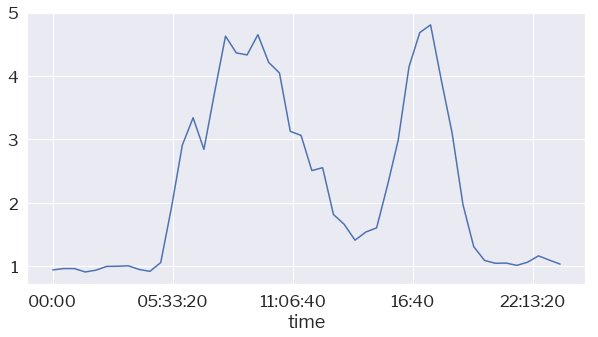

Segment_id:10793
Baseline speed: 100.584922824137


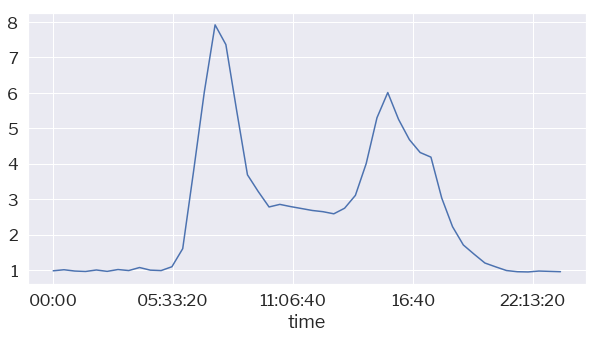

Segment_id:10794
Baseline speed: 102.923994577259


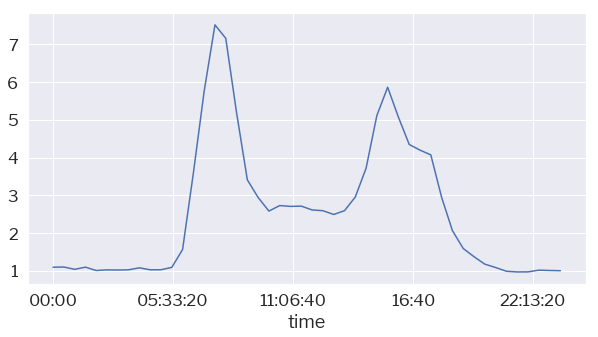

Segment_id:10795
Baseline speed: 105.108424246279


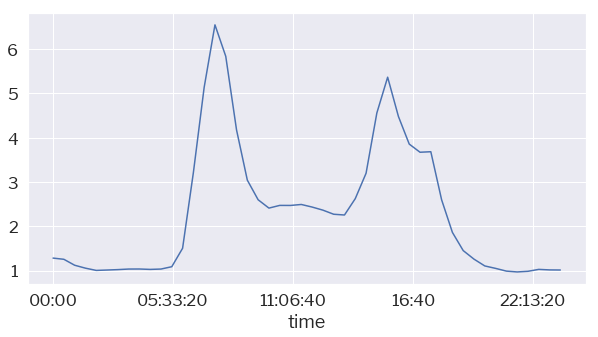

Segment_id:10978
Baseline speed: 95.012458746848


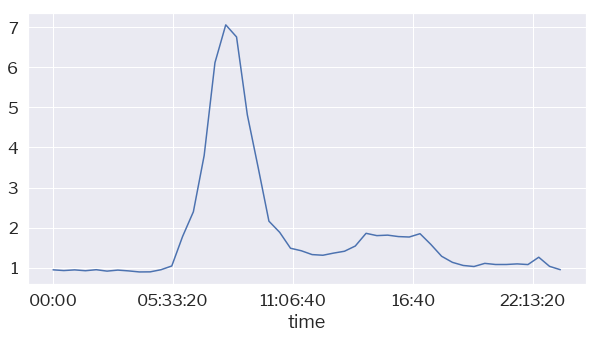

Segment_id:10979
Baseline speed: 94.2859645329402


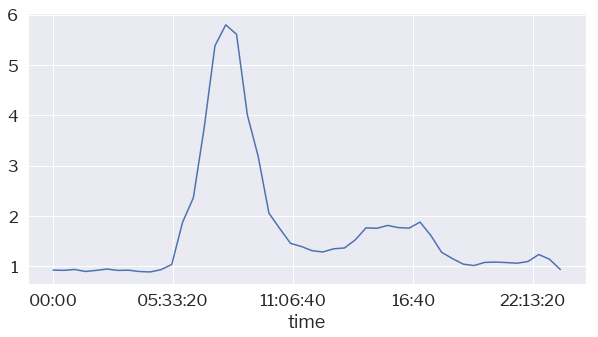

Segment_id:11109
Baseline speed: 78.6360147563567


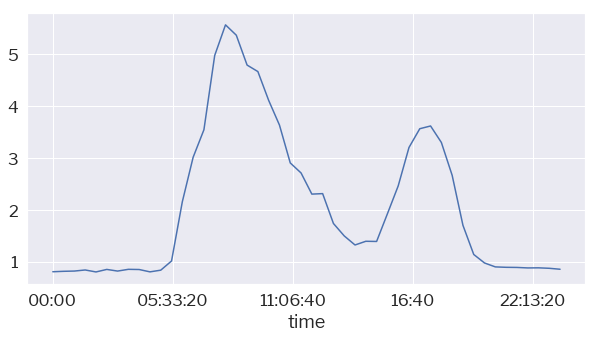

Segment_id:11110
Baseline speed: 78.0014279251525


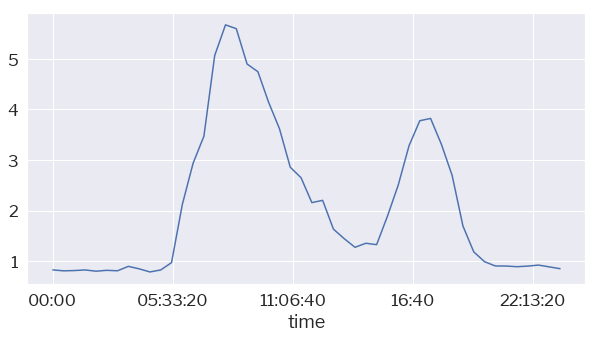

Segment_id:11183
Baseline speed: 62.0947974114271


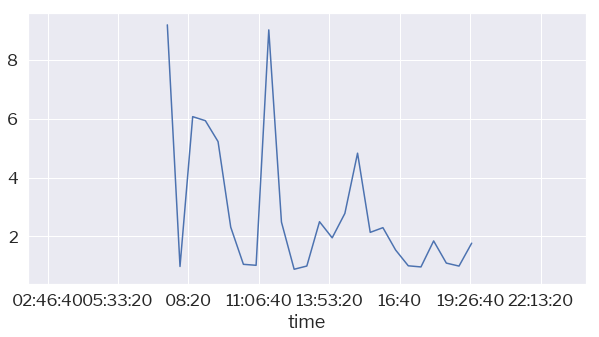

Segment_id:11416
Baseline speed: 71.6956516234046


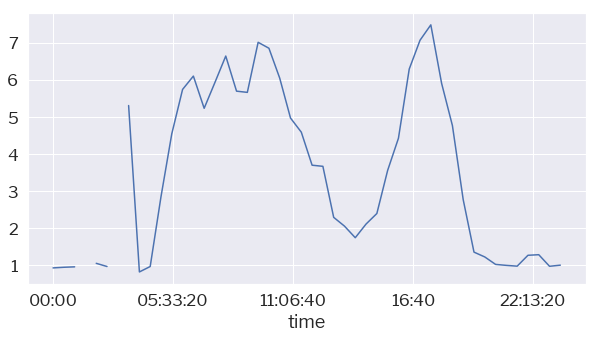

Segment_id:11533
Baseline speed: 99.5858001691128


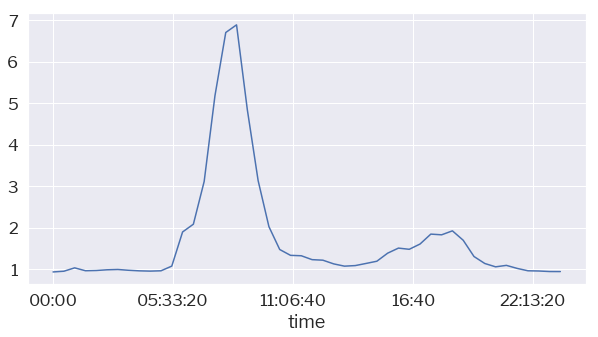

Segment_id:11595
Baseline speed: 85.1173687012952


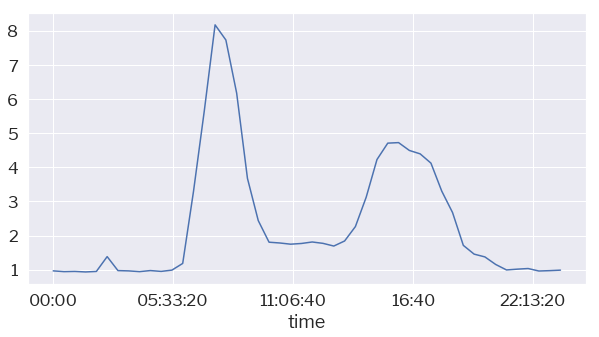

Segment_id:11614
Baseline speed: 103.470436618361


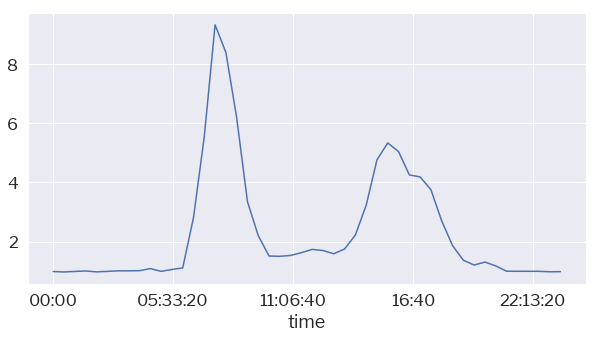

Segment_id:11615
Baseline speed: 104.73184990093


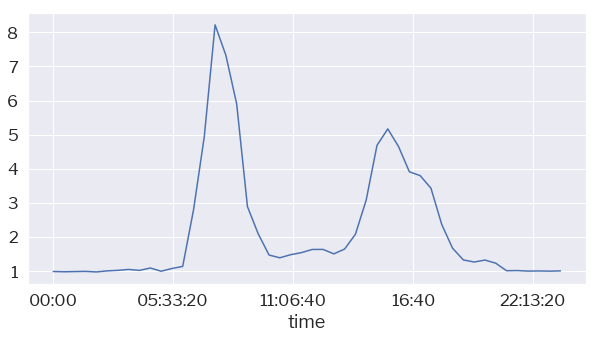

Segment_id:11660
Baseline speed: 97.4519243082526


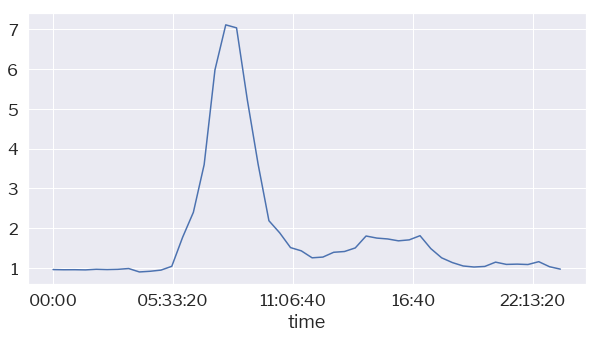

Segment_id:11661
Baseline speed: 99.3383228436186


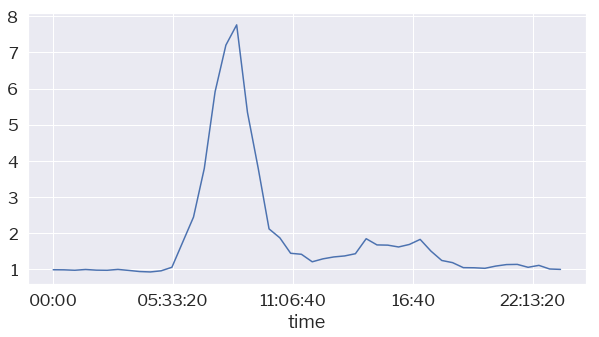

Segment_id:11958
Baseline speed: 66.7525762963546


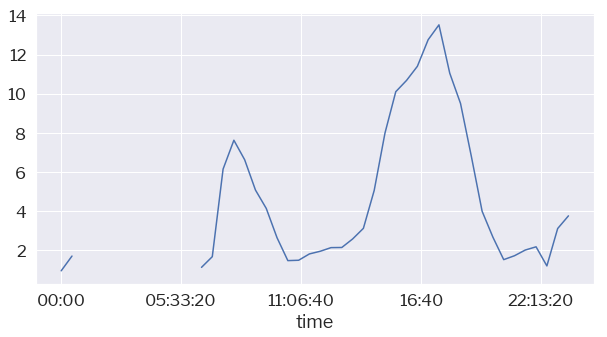

Segment_id:12014
Baseline speed: 75.5


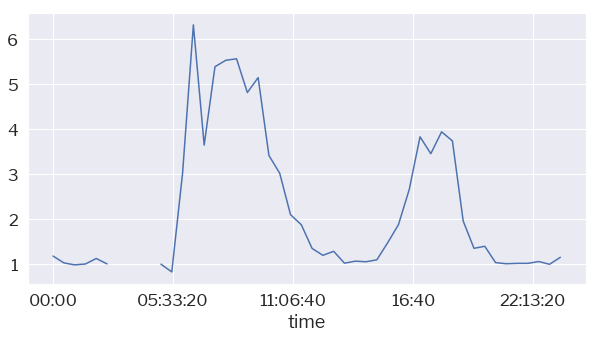

Segment_id:12103
Baseline speed: 81.6183102771211


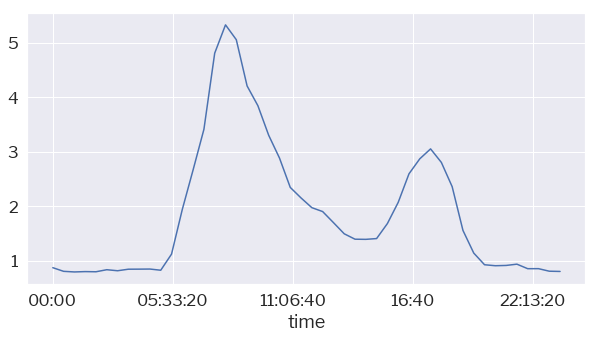

Segment_id:12403
Baseline speed: 43.5


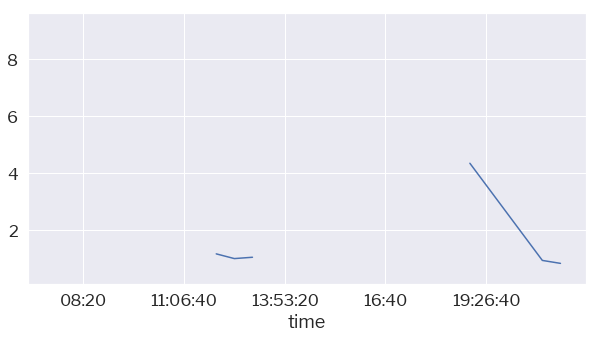

In [235]:
for i in am_segments['segment_id']:
    print('Segment_id:' + str(i))
    plt.figure(figsize=(10,5))
    data_set = data.loc[data['segment_id'] == i]
    baseline_value = baseline.loc[baseline['segment_id'] == i]['spd_baseline_25pct'].iloc[0]
    print('Baseline speed: ' +str(baseline_value))
    plt.plot(data_set['time_bin'], data_set['tti'])
    plt.show()

## PM Peak 

Segment_id:66


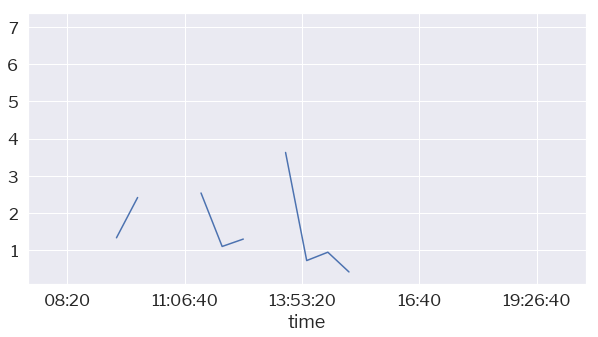

Segment_id:316


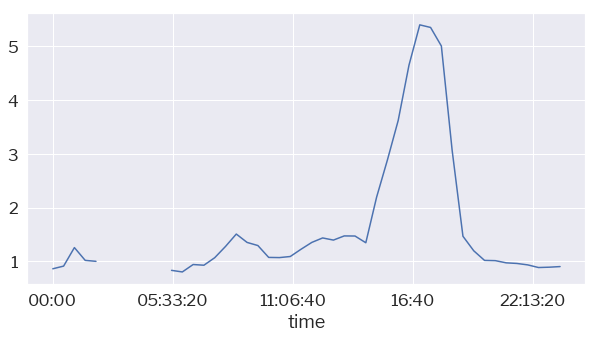

Segment_id:566


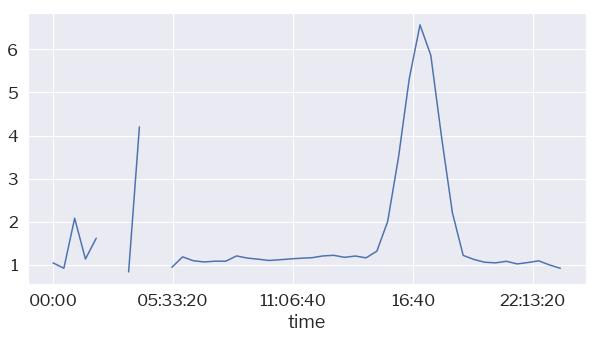

Segment_id:568


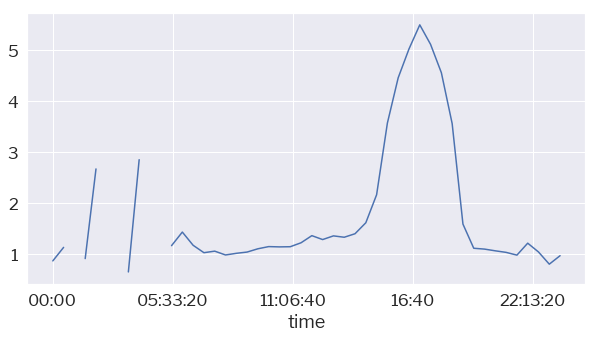

Segment_id:1307


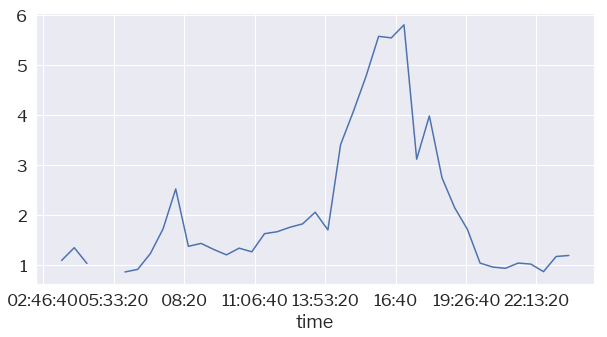

Segment_id:1914


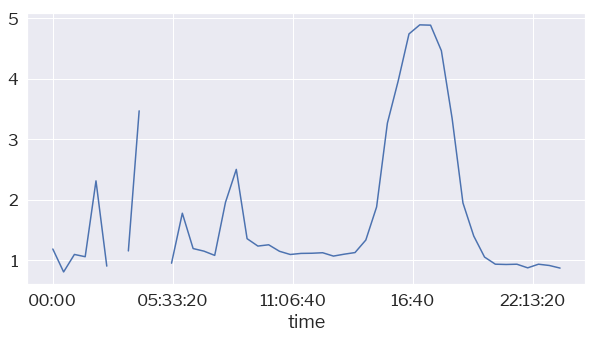

Segment_id:2033


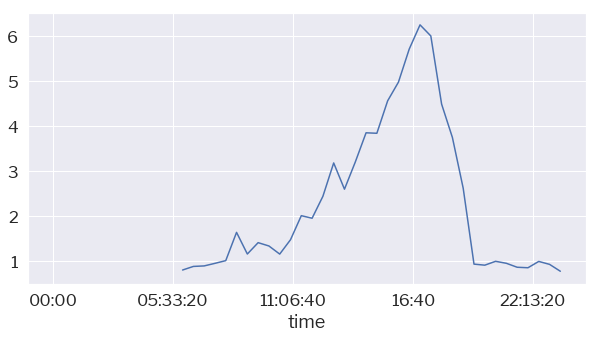

Segment_id:2968


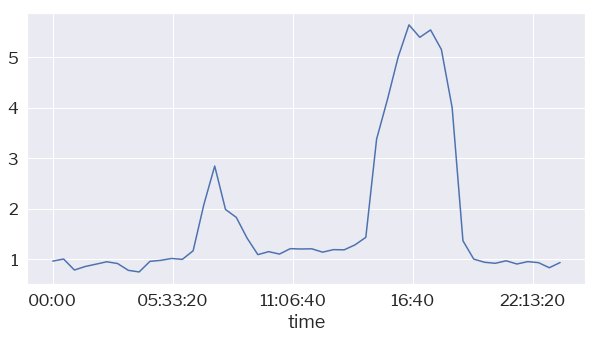

Segment_id:2971


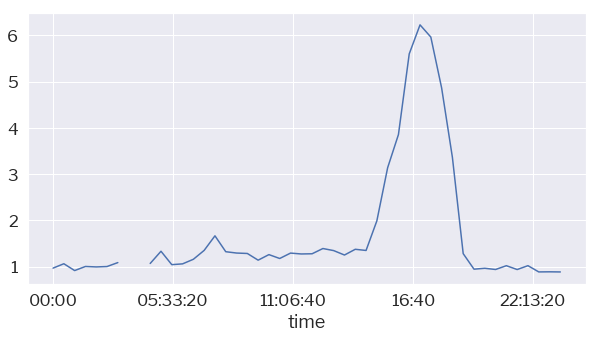

Segment_id:3699


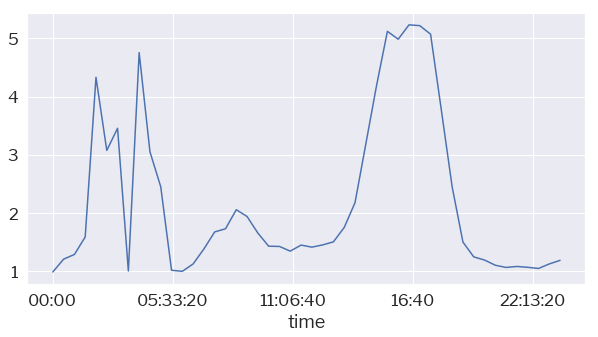

Segment_id:3713


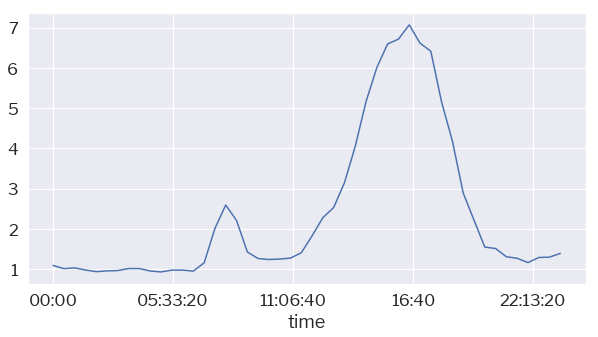

Segment_id:3714


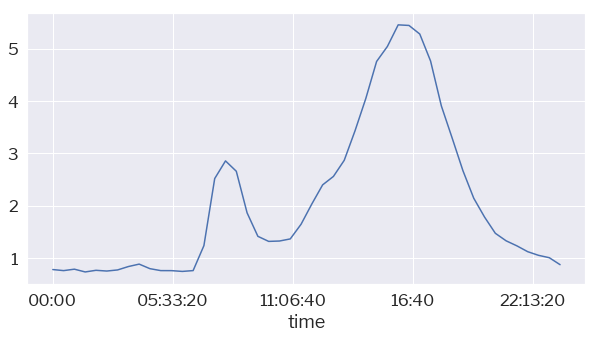

Segment_id:3715


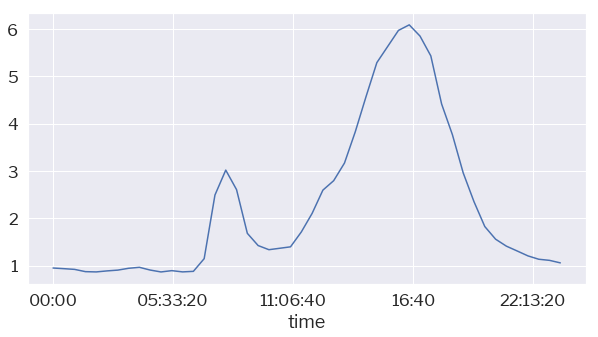

Segment_id:3716


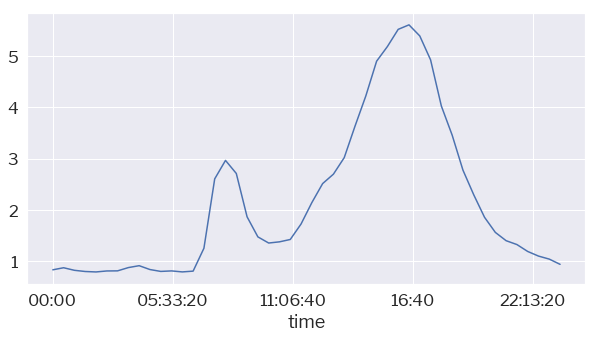

Segment_id:3717


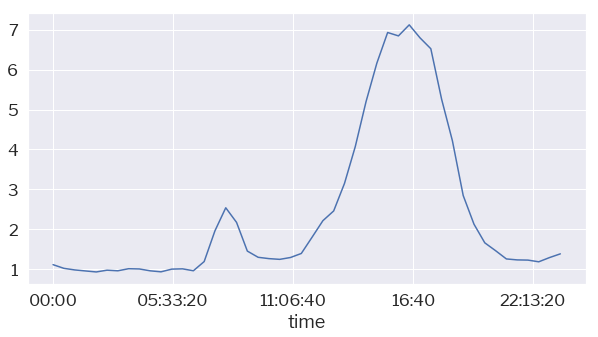

Segment_id:3718


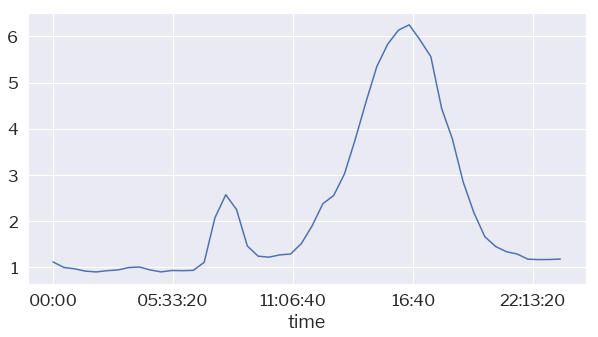

Segment_id:3719


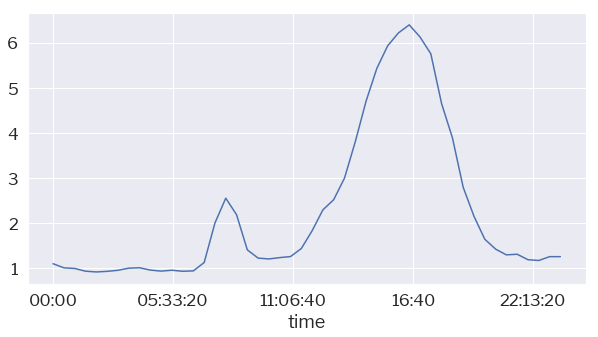

Segment_id:4533


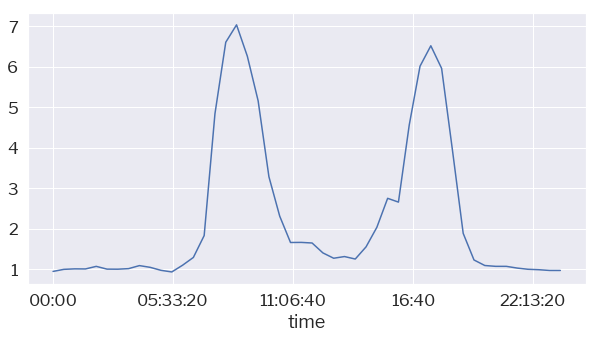

Segment_id:4540


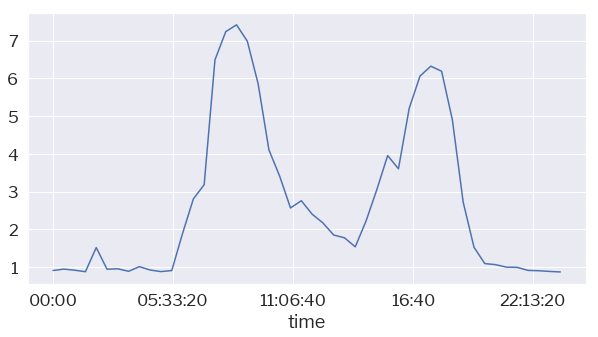

Segment_id:4820


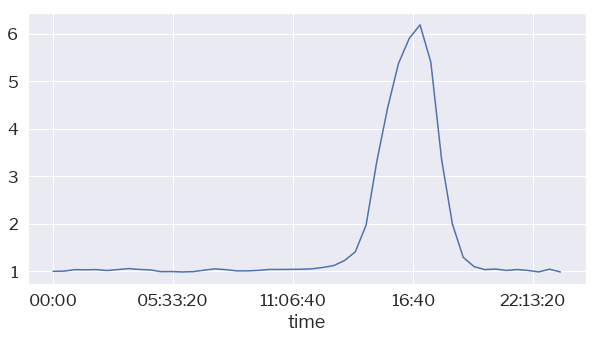

Segment_id:4821


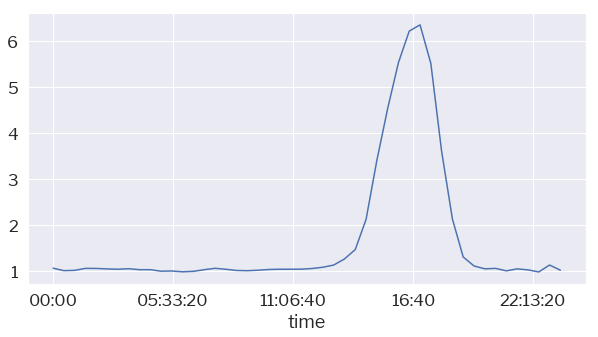

Segment_id:4823


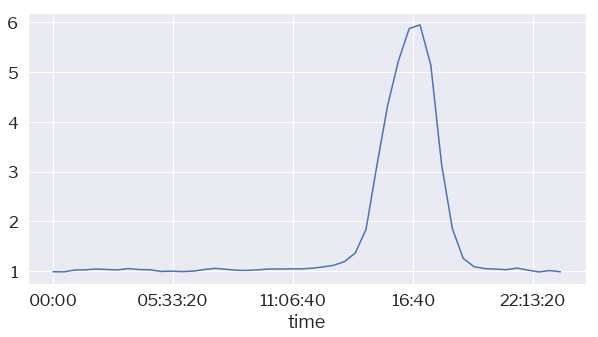

Segment_id:6128


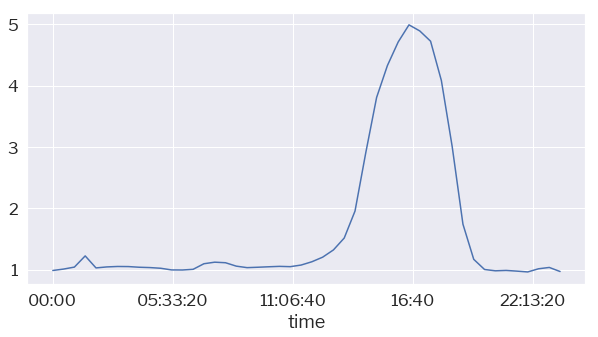

Segment_id:6129


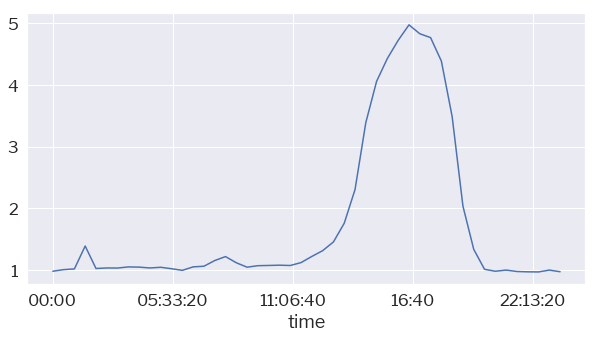

Segment_id:6130


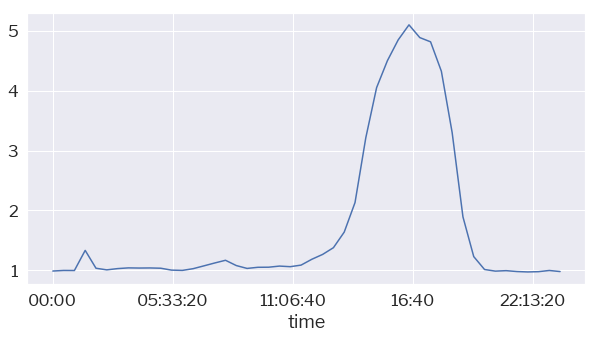

Segment_id:6825


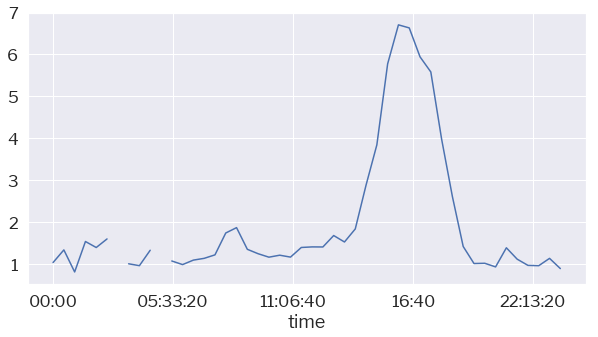

Segment_id:7179


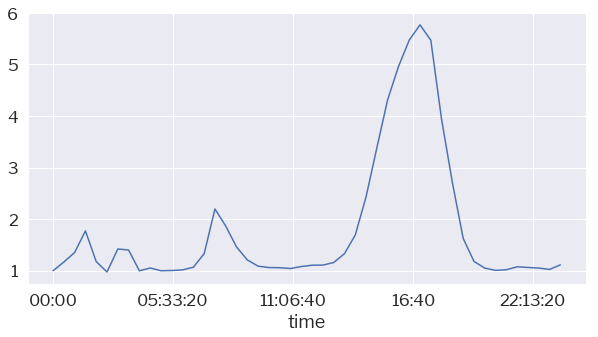

Segment_id:7180


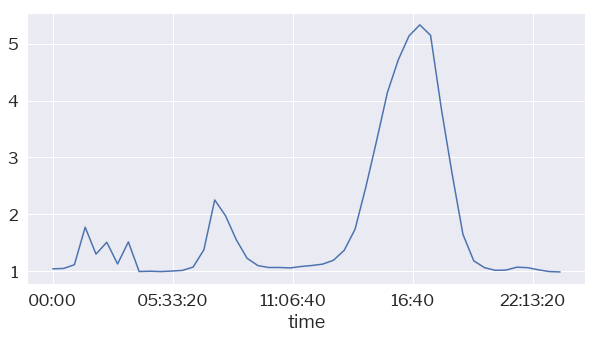

Segment_id:7232


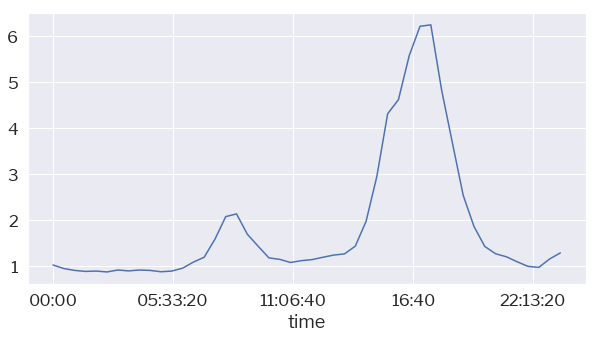

Segment_id:7234


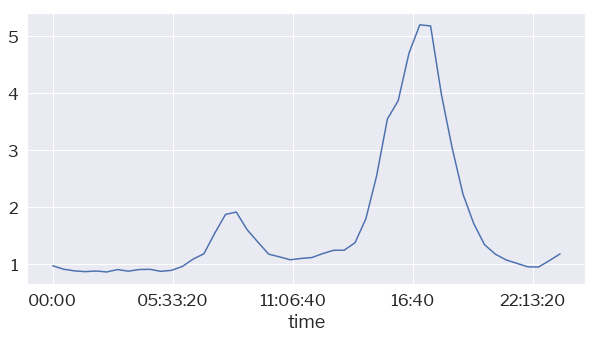

Segment_id:7264


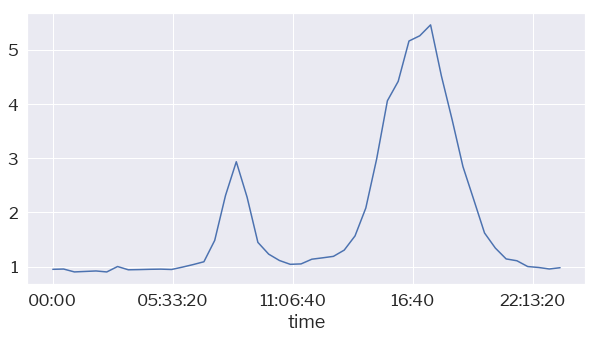

Segment_id:7265


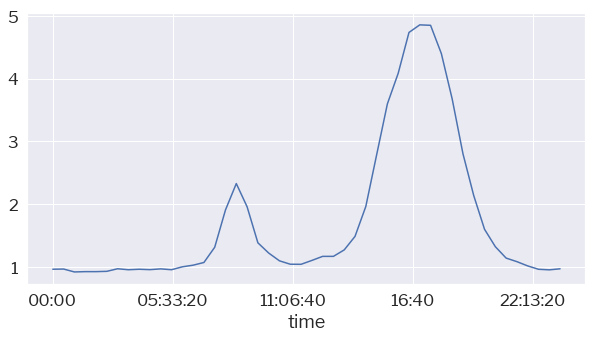

Segment_id:7266


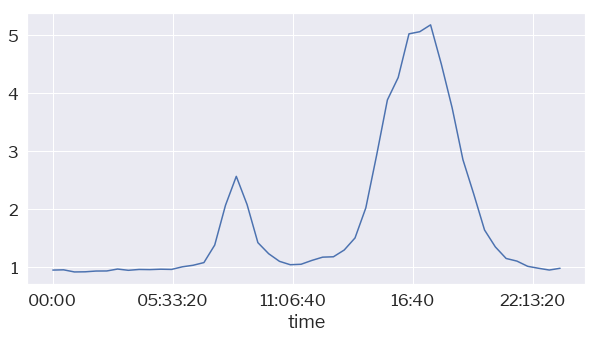

Segment_id:8218


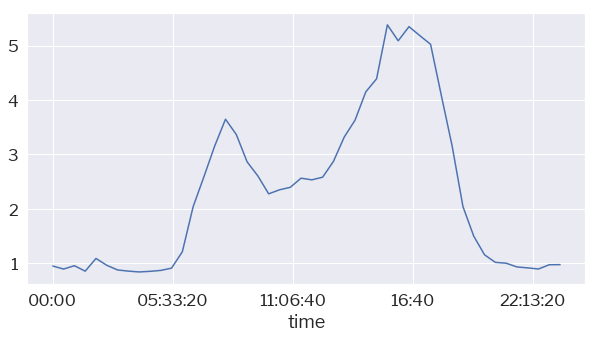

Segment_id:8220


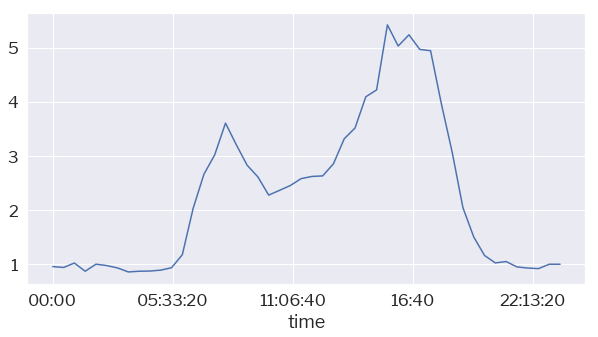

Segment_id:8260


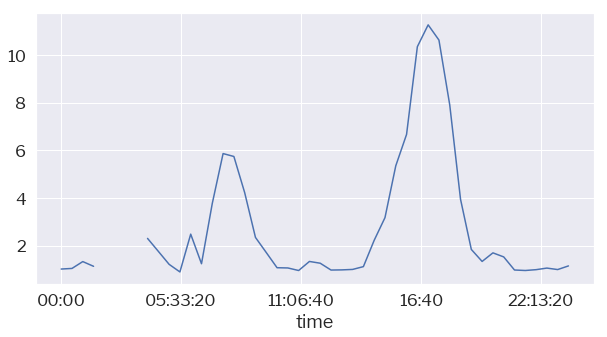

Segment_id:8261


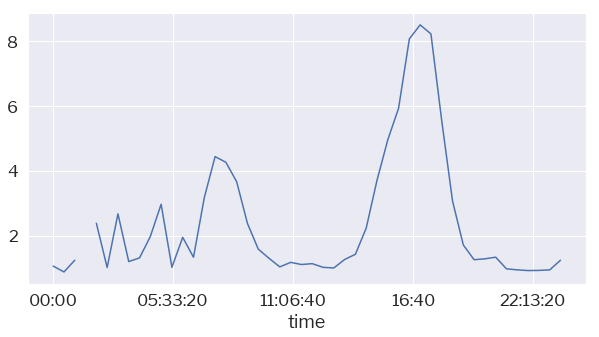

Segment_id:8495


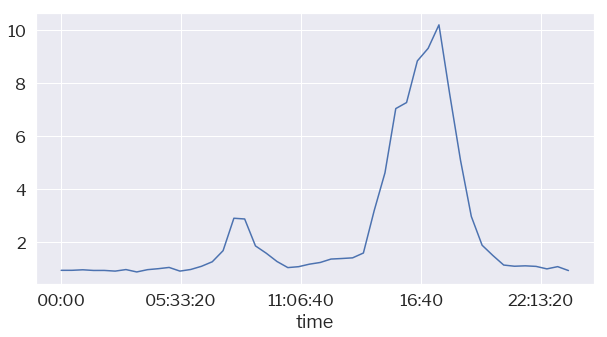

Segment_id:8498


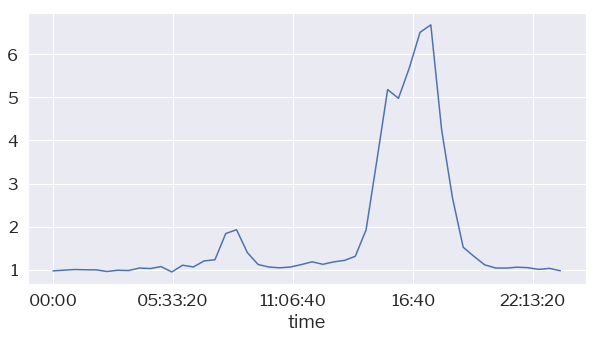

Segment_id:8564


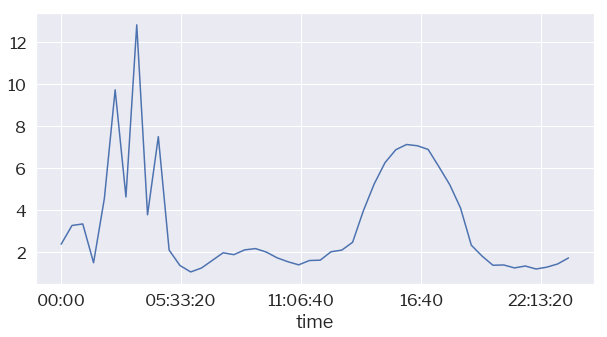

Segment_id:8961


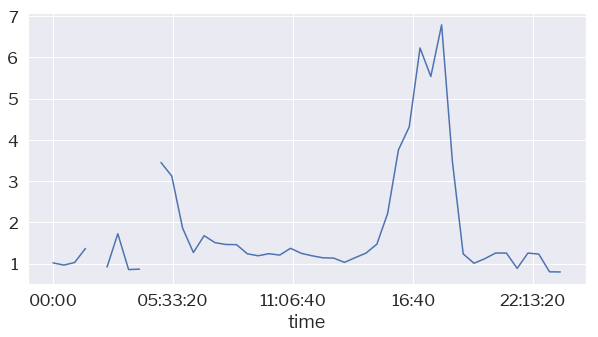

Segment_id:9164


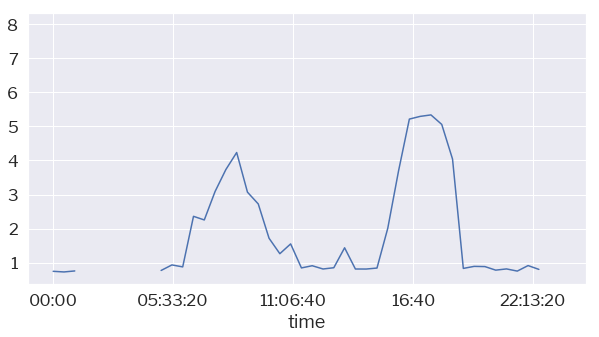

Segment_id:9187


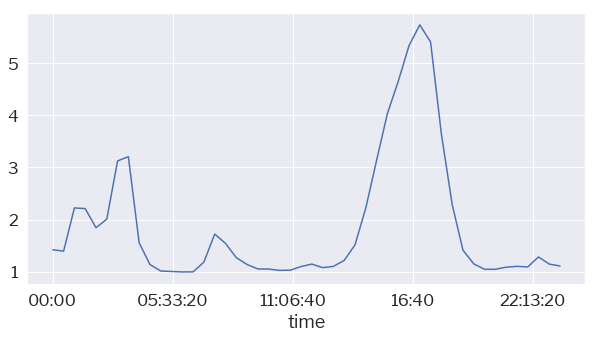

Segment_id:9776


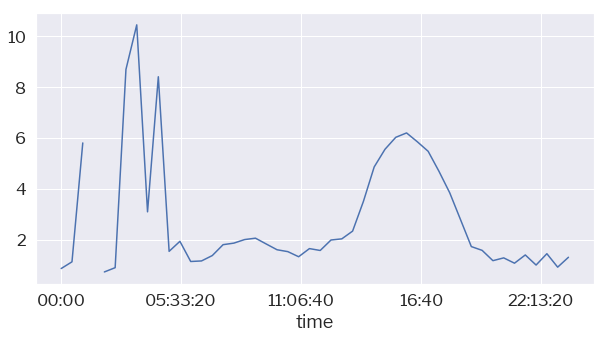

Segment_id:10090


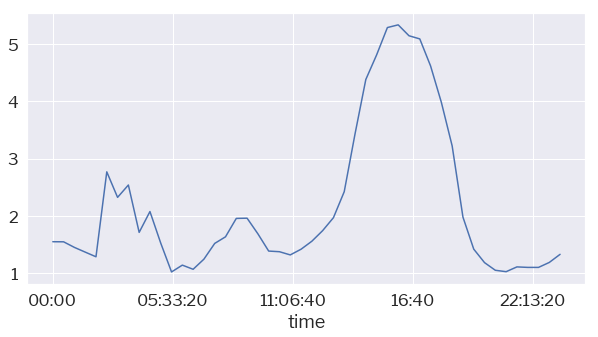

Segment_id:10096


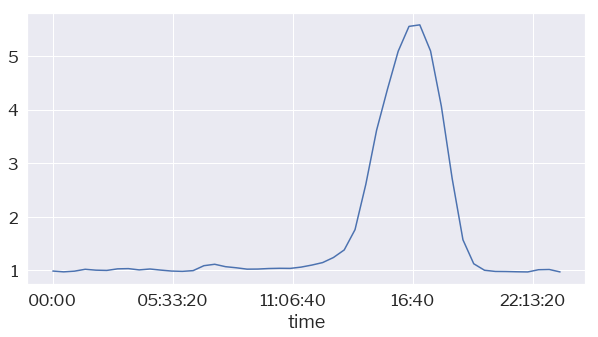

Segment_id:10097


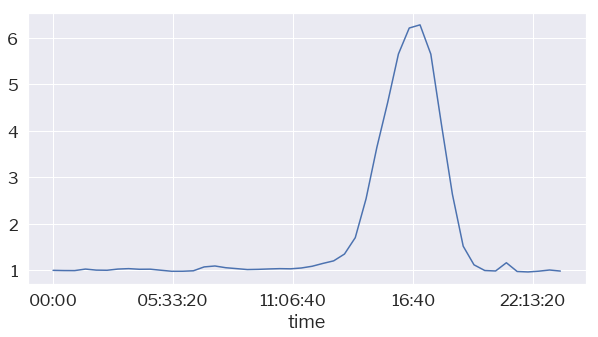

Segment_id:10393


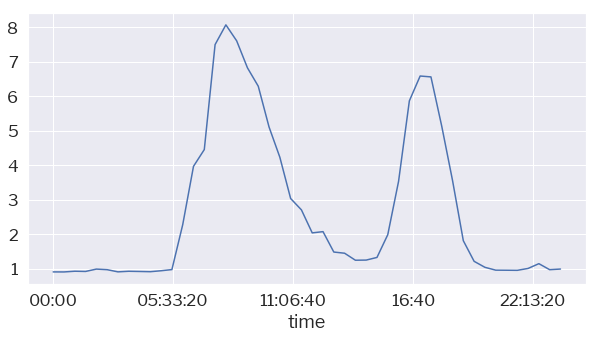

Segment_id:10816


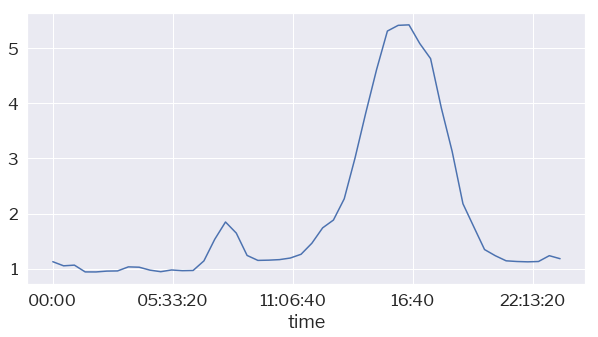

Segment_id:10823


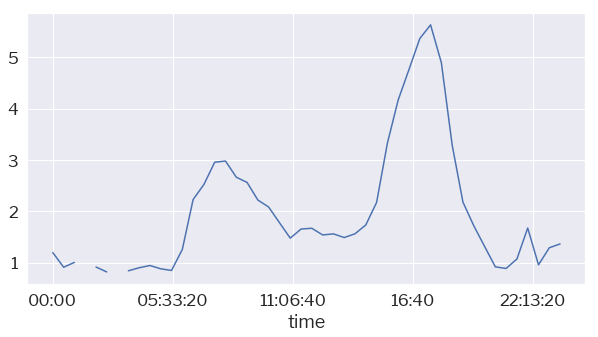

Segment_id:10856


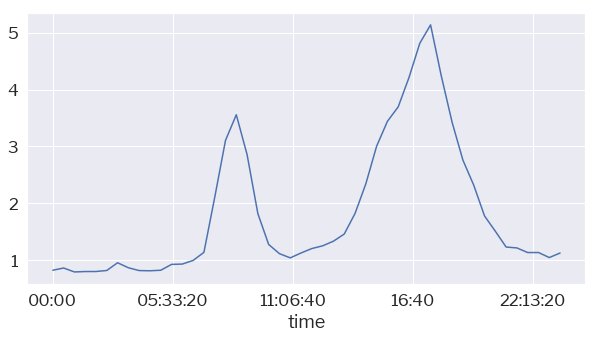

Segment_id:10880


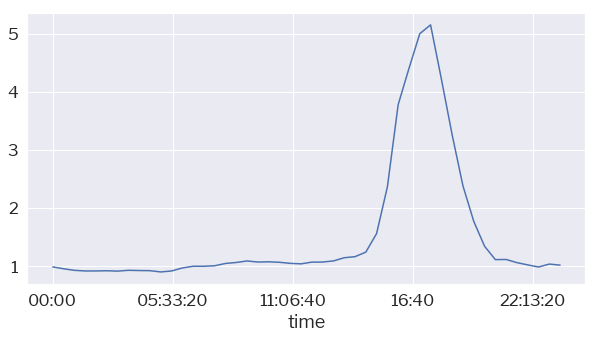

Segment_id:11018


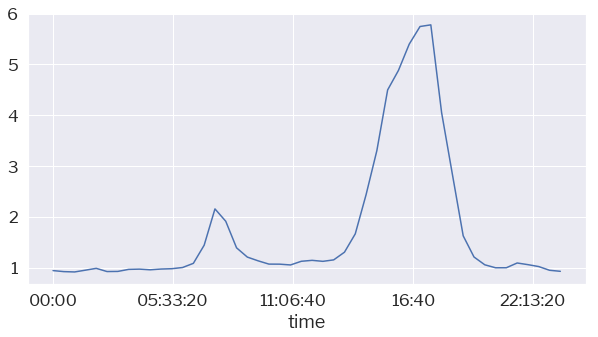

Segment_id:11019


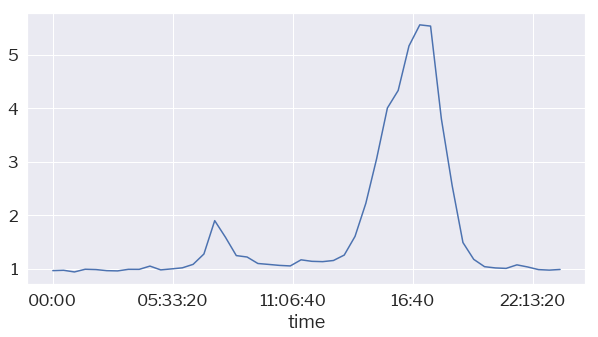

Segment_id:11072


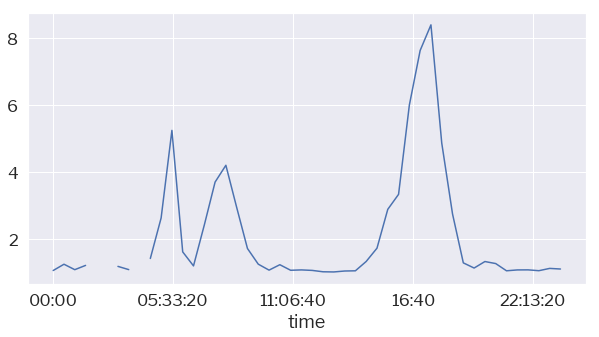

Segment_id:11416


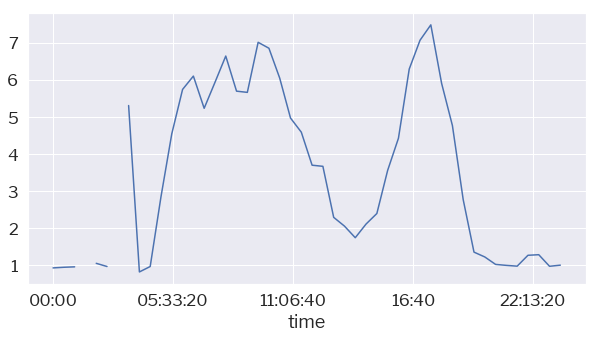

Segment_id:11496


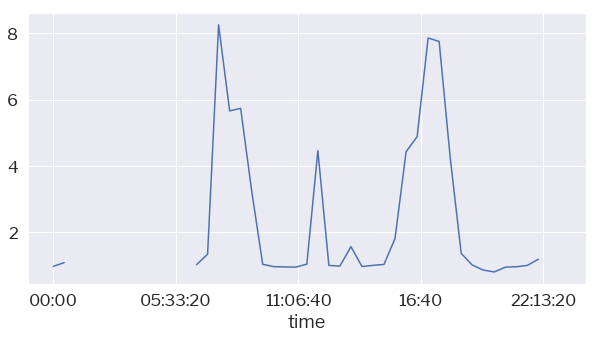

Segment_id:11520


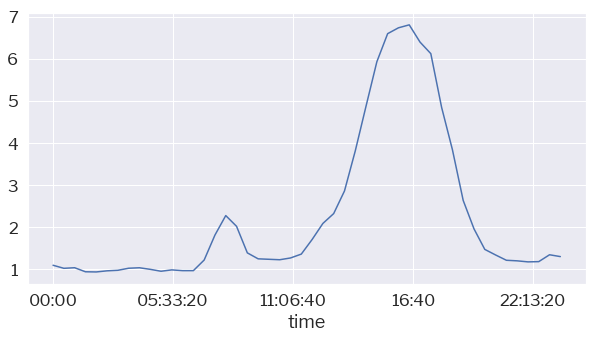

Segment_id:11521


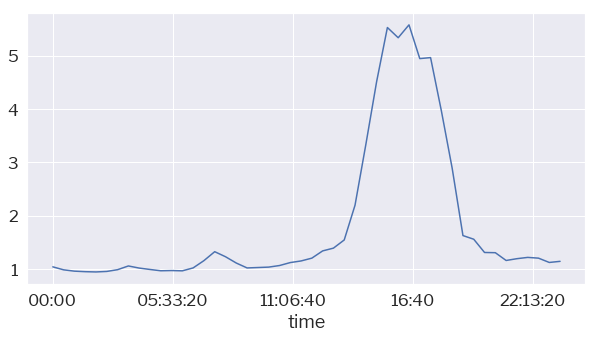

Segment_id:11522


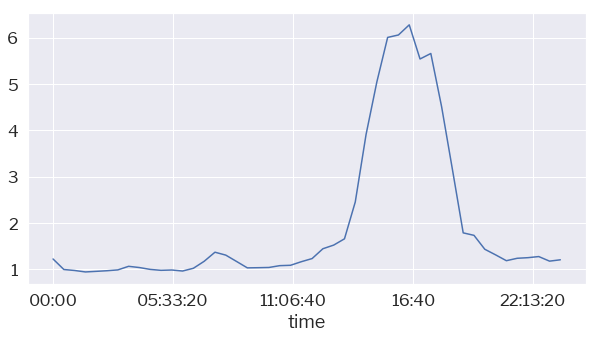

Segment_id:11543


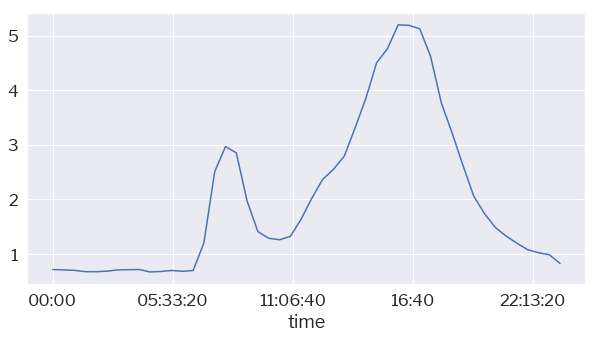

Segment_id:11552


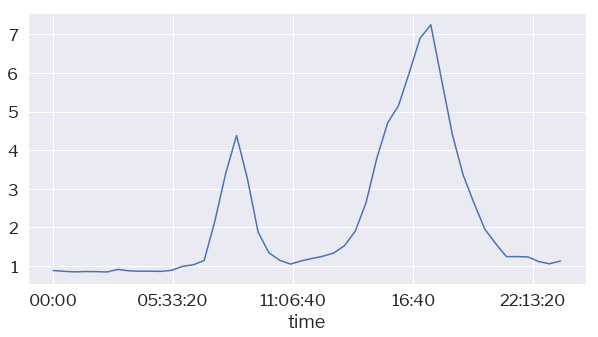

Segment_id:11553


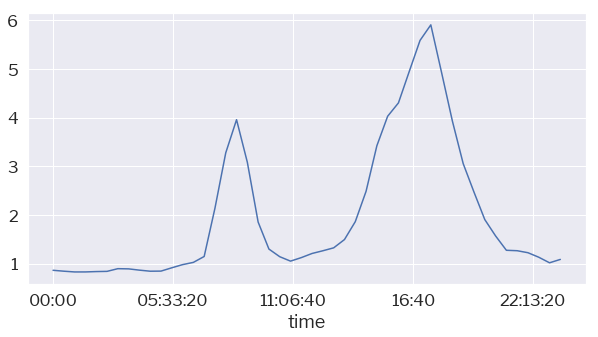

Segment_id:11566


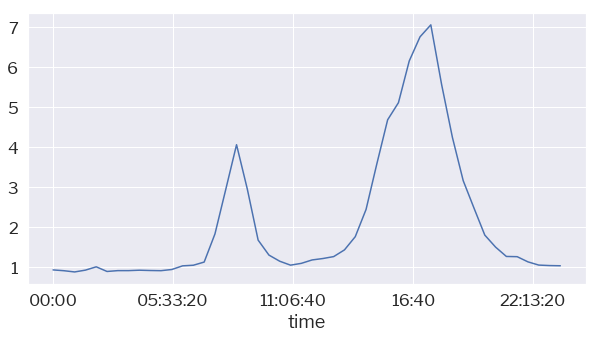

Segment_id:11578


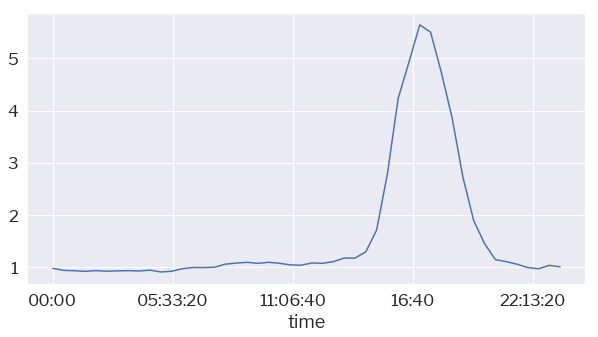

Segment_id:11624


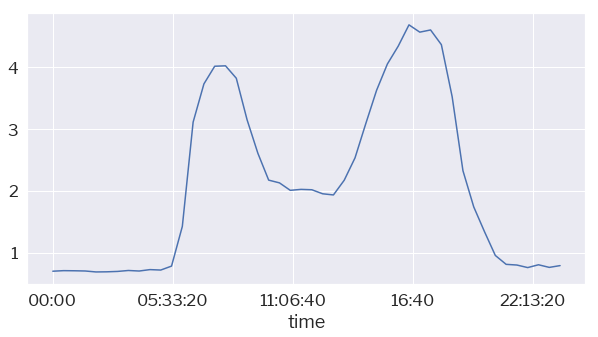

Segment_id:11788


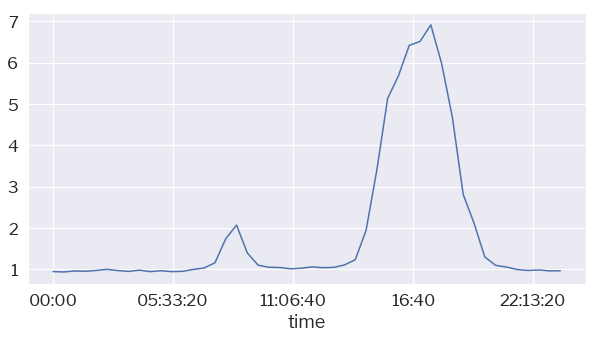

Segment_id:11897


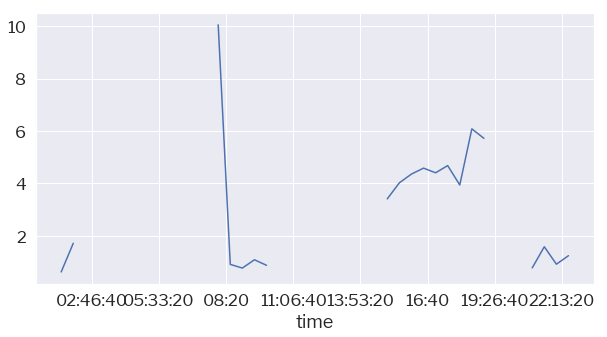

Segment_id:11945


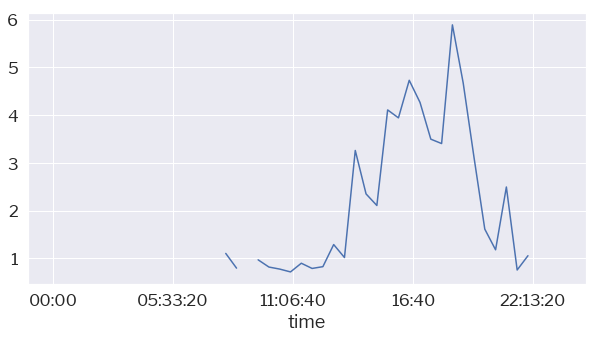

Segment_id:11946


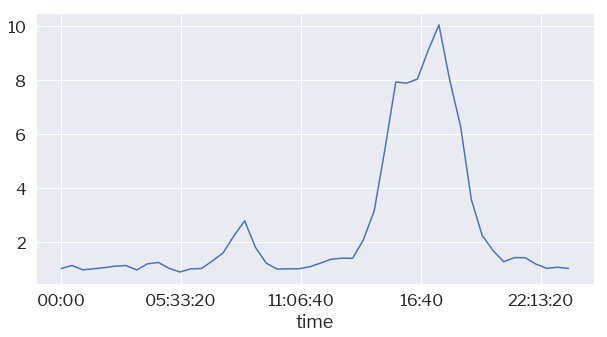

Segment_id:11947


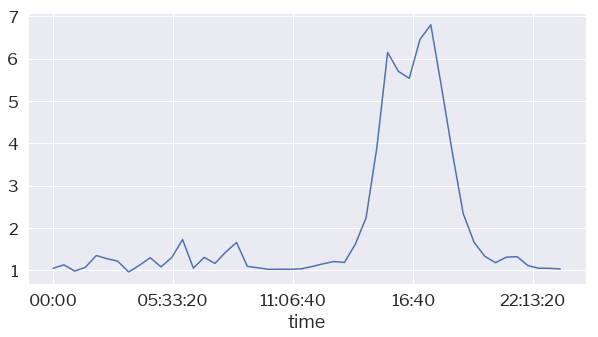

Segment_id:11958


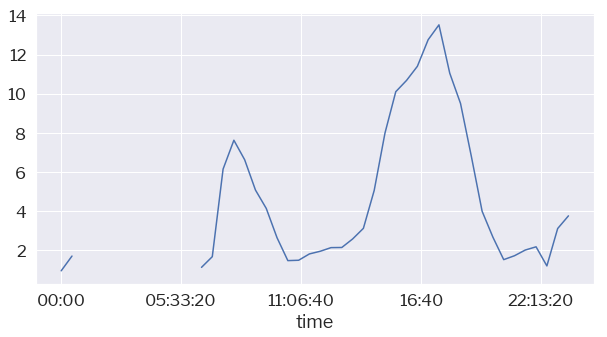

Segment_id:12089


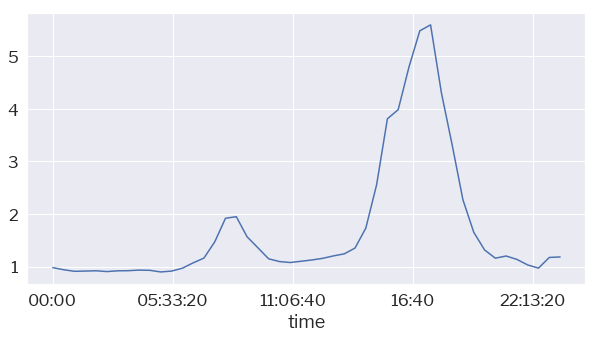

Segment_id:12106


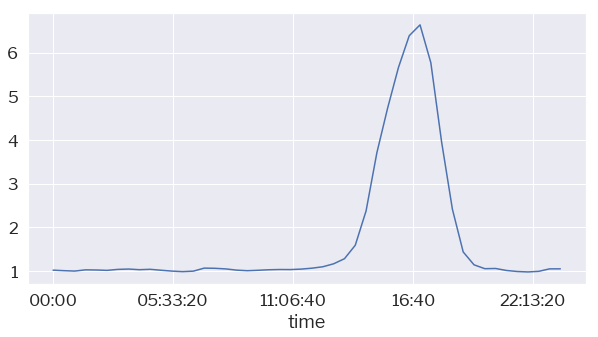

Segment_id:12145


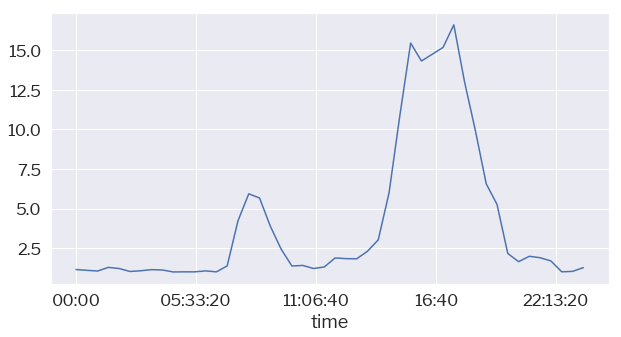

Segment_id:12146


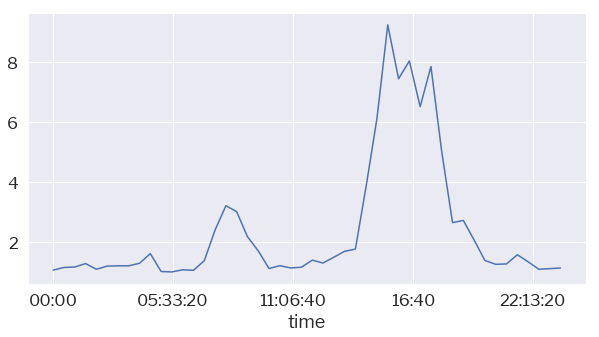

Segment_id:12203


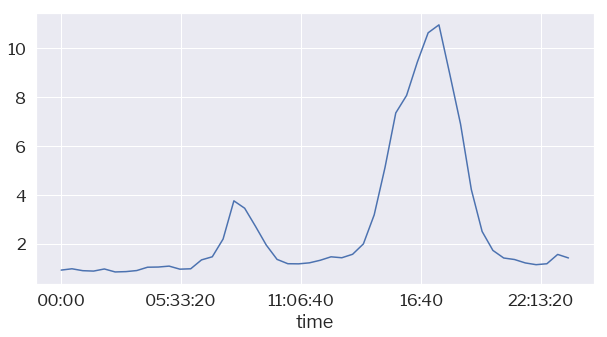

Segment_id:12311


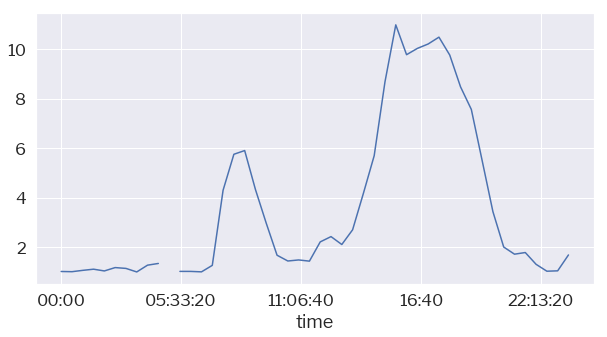

Segment_id:12403


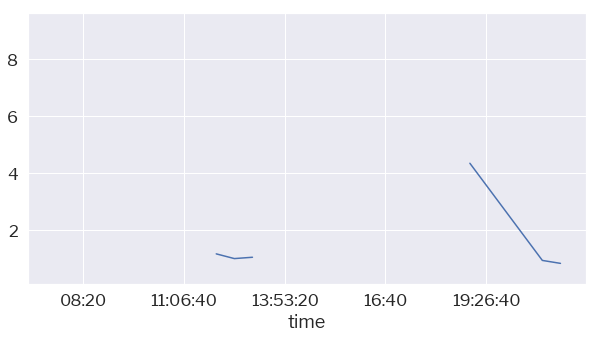

In [231]:
for i in pm_segments['segment_id']:
    print('Segment_id:' + str(i))
    plt.figure(figsize=(10,5))
    data_set = data.loc[data['segment_id'] == i]
    plt.plot(data_set['time_bin'], data_set['tti'])
    plt.show()

In [361]:
segment = pd.read_sql ('''select (datetime_bin::time)::text as dt, segment_tt_avg_hc, segment_tt_med_hc from congestion.tt_segments_30min_v4_2019 where segment_id = 9783
                            ''',con)

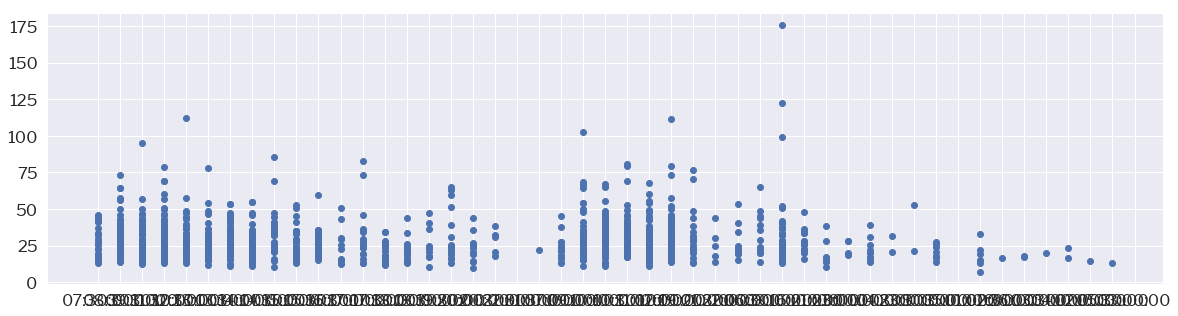

In [362]:

plt.figure(figsize=(20,5))
plt.scatter(segment['dt'], segment['segment_tt_avg_hc'])
plt.show()

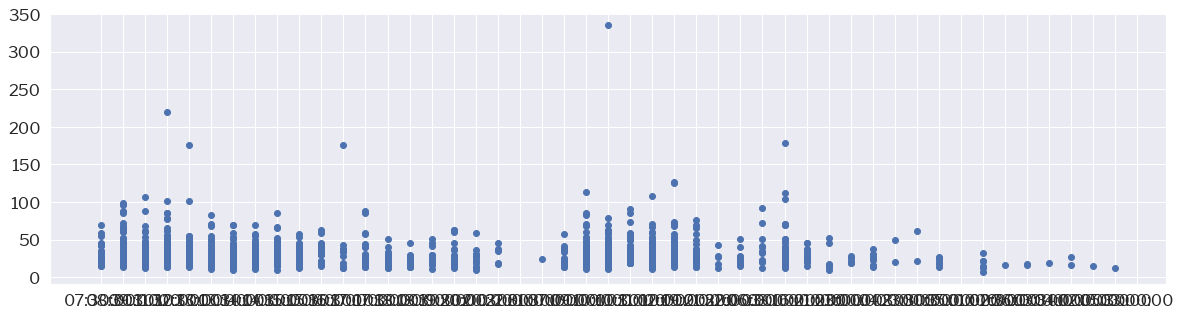

In [363]:

plt.figure(figsize=(20,5))
plt.scatter(segment['dt'], segment['segment_tt_med_hc'])
plt.show()

In [291]:
abc = pd.read_sql('''with thritybin as (
SELECT segment_id, (datetime_bin(tx,30)) AS datetime_bin, 220/harmean(mean) * 3.6 as mean, 220/harmean(pct_50)*3.6 as pct_50, 220/harmean(pct_50_corr)*3.6 as pct_50_corr
FROM here.ta
JOIN congestion.segment_links_v4 using (link_dir)
WHERE link_dir = '943899266T'
AND tx BETWEEN '2019-01-01 00:00:00' AND '2019-12-31 23:59:00'
AND confidence >= 30
GROUP BY segment_id, link_dir, datetime_bin, length)
select datetime_bin::time without time zone as time_bin, avg(mean) as avg_mean, avg(pct_50) as avg_pct_50, avg(pct_50_corr) as avg_pct_50_corr
from thritybin
group by time_bin
order by time_bin''',con)

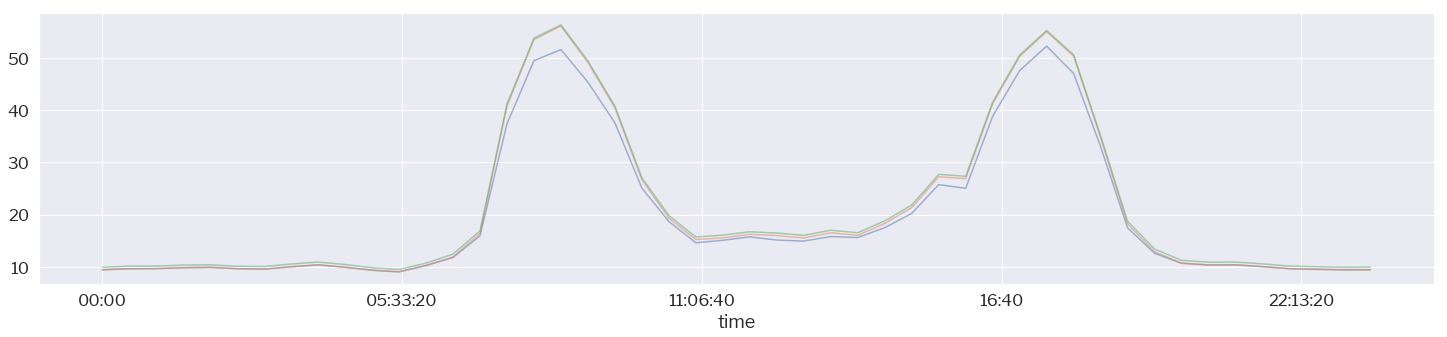

In [293]:
plt.figure(figsize=(25,5))
plt.plot(abc['time_bin'], abc['avg_mean'], alpha=0.5)
plt.plot(abc['time_bin'], abc['avg_pct_50'], alpha=0.5)
plt.plot(abc['time_bin'], abc['avg_pct_50_corr'], alpha=0.5)
plt.show()

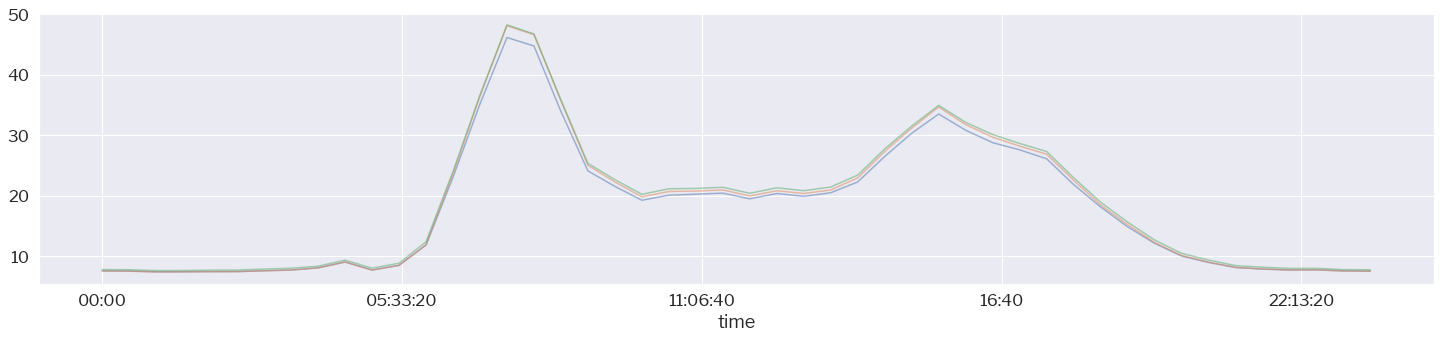

In [295]:
abc = pd.read_sql('''with thritybin as (
SELECT segment_id, (datetime_bin(tx,30)) AS datetime_bin, 220/harmean(mean) * 3.6 as mean, 220/harmean(pct_50)*3.6 as pct_50, 220/harmean(pct_50_corr)*3.6 as pct_50_corr
FROM here.ta
JOIN congestion.segment_links_v4 using (link_dir)
WHERE link_dir = '792430494F'
AND tx BETWEEN '2019-01-01 00:00:00' AND '2019-12-31 23:59:00'
AND confidence >= 30
GROUP BY segment_id, link_dir, datetime_bin, length)
select datetime_bin::time without time zone as time_bin, avg(mean) as avg_mean, avg(pct_50) as avg_pct_50, avg(pct_50_corr) as avg_pct_50_corr
from thritybin
group by time_bin
order by time_bin''',con)

plt.figure(figsize=(25,5))
plt.plot(abc['time_bin'], abc['avg_mean'], alpha=0.5)
plt.plot(abc['time_bin'], abc['avg_pct_50'], alpha=0.5)
plt.plot(abc['time_bin'], abc['avg_pct_50_corr'], alpha=0.5)
plt.show()

## Baseline differences using 35th pct mean and 25 pct median 

Text(0.5, 1.0, '25th Percentile Mean vs Median')

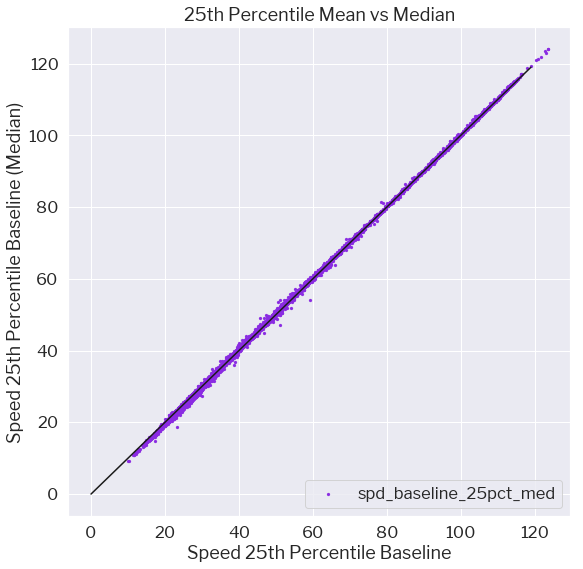

In [315]:
all_baseline = pandasql.read_sql('''
SELECT *
FROM congestion.tt_segments_baseline_v4_2019''', con)

fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['spd_baseline_25pct'], all_baseline['spd_baseline_25pct_med'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 25th Percentile Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline (Median)')
ax.set_title('25th Percentile Mean vs Median')

## TTI Differences in mean and median 

Text(0.5, 1.0, 'TTI Mean vs Median')

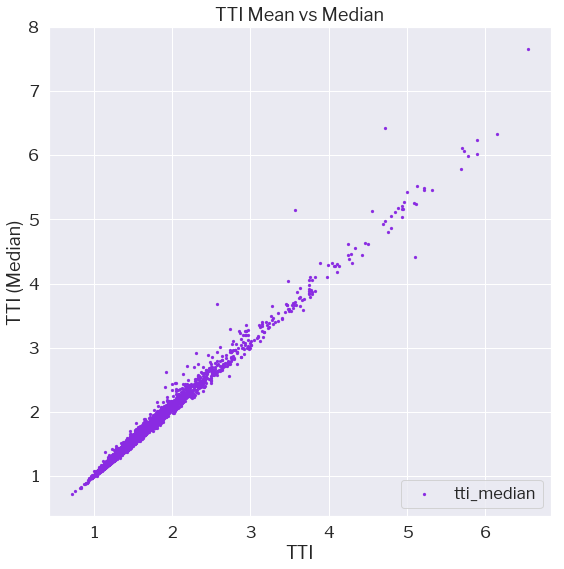

In [321]:

all_baseline = pandasql.read_sql('''
  
SELECT segment_id, avg(tti) as tti, avg(tti_median) as tti_median 
FROM congestion.metrics_v4_2019_median2 where time_bin <@ '[07:00:00, 10:00:00]'::timerange		
group by segment_id		''', con)

fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['tti'], all_baseline['tti_median'], marker = '.', linewidths =0.25, c='blueviolet')
#ax.plot(range(0,7), range(0,7), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('TTI')
ax.set_ylabel('TTI (Median)')
ax.set_title('TTI Mean vs Median')

# Buffer Index

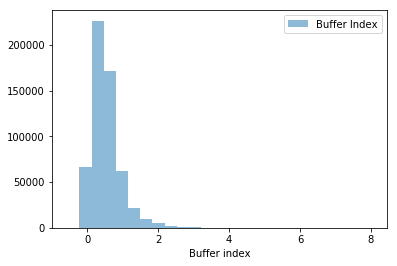

In [12]:
buffer_index = pd.read_sql('''select * from congestion.metrics_v4_2019''',con)
plt.hist(buffer_index.bi, 25, alpha=0.5, label = 'Buffer Index')
plt.xlabel('Buffer index')
#plt.ylabel('# of obs')
#plt.xlim(0, 125)
plt.legend(loc='upper right')
plt.show()

In [17]:
max_min_bi = pd.read_sql('''select min(bi), max(bi) from congestion.metrics_v4_2019 ''',con)
print('Buffer index for segments v4 ranges from:')
print('Max buffer index: ' + str(max_min_bi['max'].iloc[0]))
print('Min buffer index: ' + str(max_min_bi['min'].iloc[0]))

Buffer index for segments v4 ranges from:
Max buffer index: 8.01781336025242
Min buffer index: -0.562387829795815


## Investigate high buffer index

In [24]:
# Where bi > 3
# 83 rows in total
high_bi = pd.read_sql('''select * from congestion.metrics_v4_2019 where bi is not null and bi > 3 order by bi desc ''',con)

Where buffer index is higher than 3 (664 segments in total)

Text(0.5, 1.0, 'Avg tt vs. Pct_95th travel time')

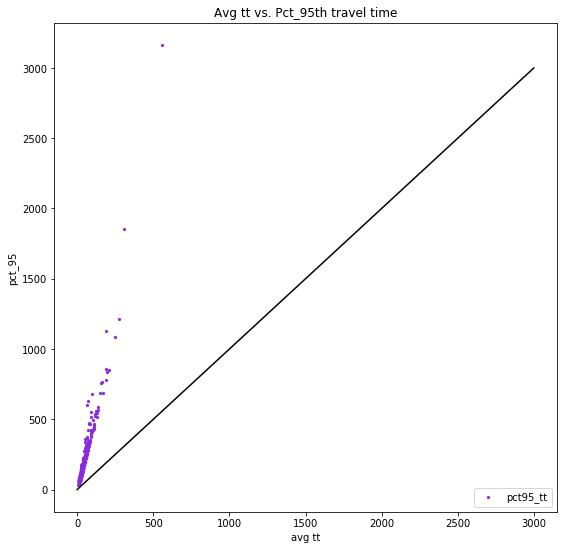

In [25]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(high_bi['avg_tt'], high_bi['pct95_tt'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,3000), range(0,3000), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('avg tt')
ax.set_ylabel('pct_95')
ax.set_title('Avg tt vs. Pct_95th travel time')

##### What is happening at that 3000 pct95_tt ?

at Nugget Avenue between McCowan and Shorting Road (segment_id = 10397)

In [ ]:
look at the counts of obs